# Qs 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import filters


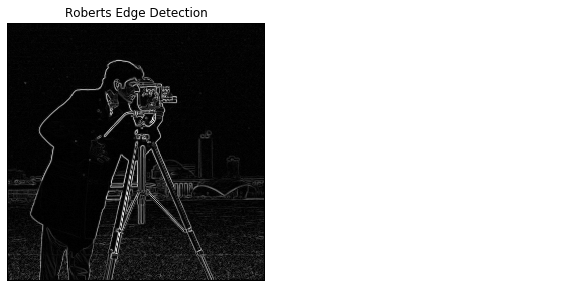

In [22]:
#Roberts

image = camera()
edge_roberts= filters.roberts(image)
edge_sobel=filters.sobel(image)
fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')
#axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
#axes[1].set_title('Sobel Edge Detection')
for ax in axes:
    ax.axis('off')
plt.tight_layout()


plt.show()



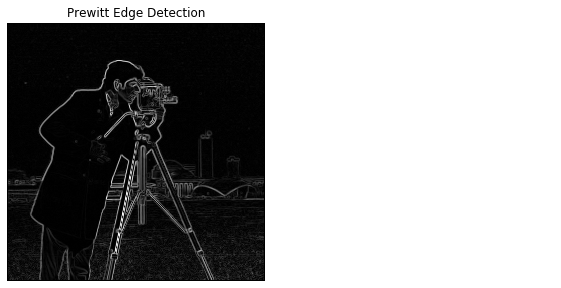

In [41]:
#Prewitt
edge_prewitt=filters.prewitt(image)
fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

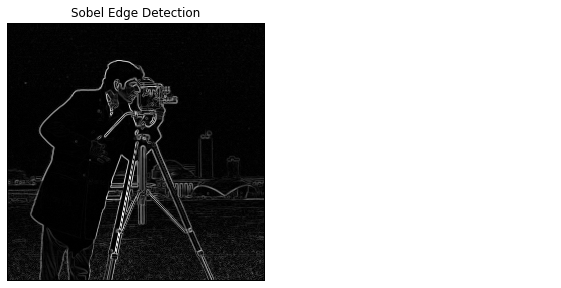

In [25]:
#Sobel
image = camera()
edge_sobel=filters.sobel(image)
fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
axes[0].set_title('Sobel Edge Detection')
for ax in axes:
    ax.axis('off')
plt.tight_layout()


plt.show()

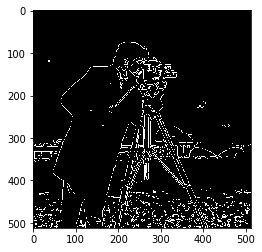

In [42]:
#canny
edge_canny= cv2.Canny(image,100,200)
plt.imshow(edge_canny, cmap=plt.cm.gray)

# Qs 2)

# a)

1.0
(66, 100)


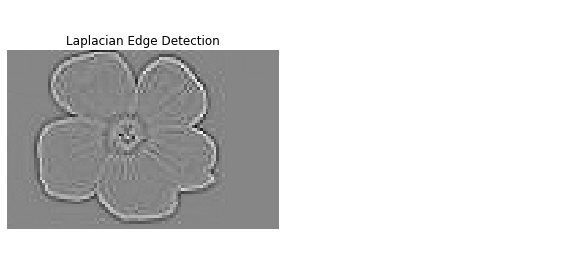

In [64]:
import scipy
from scipy import misc, signal
from scipy import ndimage, misc
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

im = rgb2gray(imread('C:/Users/Rishika/Desktop/imagelab/new_tetraphylla_flower.jpg')).astype(float)
print(np.max(im))
print(im.shape)

# Define Laplacian mask/kernel
laplacian_im = cv2.Laplacian(im,cv2.CV_64F)
#plt.imshow(laplacian_im,cmap=plt.cm.gray)
fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
axes[0].imshow(laplacian_im, cmap=plt.cm.gray)
axes[0].set_title('Laplacian Edge Detection')
axes[0].imshow(laplacian_im, cmap=plt.cm.gray)
axes[0].set_title('Laplacian Edge Detection')
#fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
for ax in axes:
    ax.axis('off')
plt.tight_layout()

#laplace_kernel[2,2] = 1
#im_edges = scipy.ndimage.filters.laplace(laplace_kernel)   # Write program to convolve Input image with Laplacian mask
plt.show()


# Qs 2 b)

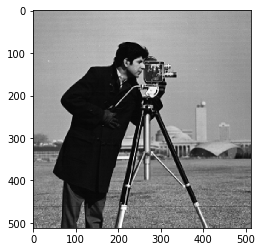

In [114]:
import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import data    

# lena = sp.misc.lena() this function was deprecated in version 0.17
img = data.camera()  # use a standard image from skimage instead
LoG = nd.gaussian_laplace(img , 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

plt.imshow(img,cmap='gray')
plt.show()

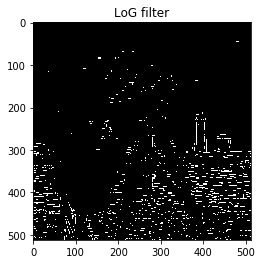

In [119]:

plt.imshow(output,cmap='gray')
plt.title("LoG filter")
plt.show()

# Qs 3)

# a)	Read an input image (grayscale)
# b)	Laplacian of a)


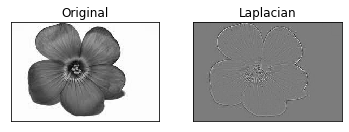

In [110]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/Rishika/Desktop/new_flower2.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
#sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
#sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

# c)	Add a) and b). By this, sharpened image will be obtained

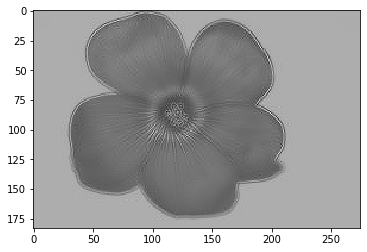

In [111]:
aplusb=img+laplacian
plt.imshow(aplusb,cmap='gray')
plt.show()

# d)	Sobel of a)

(183, 275)


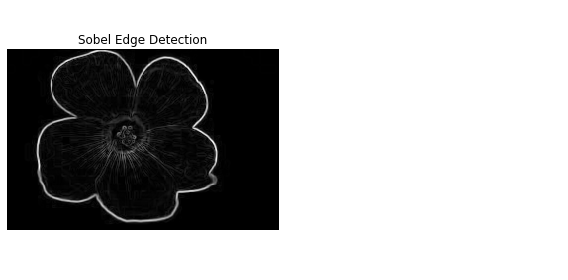

In [89]:
#print(image.shape)
#image.transpose(2,0,1).reshape(3,-1)
imagee = cv2.imread('C:/Users/Rishika/Desktop/new_flower2.jpg')
image = imagee[:,:,0]

#image.transpose(2,0,1).reshape(3,-1)
print(image.shape)
edge_sobel=filters.sobel(image)
fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
axes[0].set_title('Sobel Edge Detection')
for ax in axes:
    ax.axis('off')
plt.tight_layout()


plt.show()

# e)	Sobel image smoothed with a 5*5 averaging filter

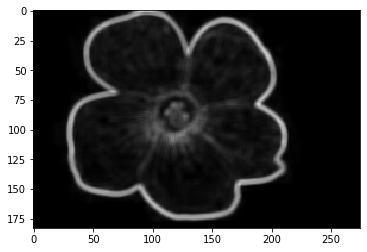

In [91]:
edge_sobel_filter = cv2.blur(edge_sobel,(5,5))
plt.imshow(edge_sobel_filter, cmap=plt.cm.gray)

# f)	Mask image formed by the product of (c) and (e).

In [95]:
imageokay = new_image[:,:,0]

#image.transpose(2,0,1).reshape(3,-1)
print(imageokay.shape)

(183, 275)


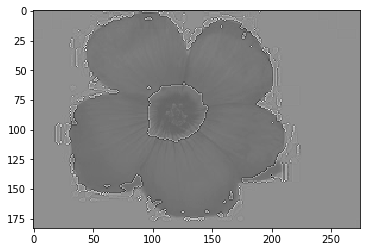

In [112]:
new_im=image+imageokay+edge_sobel_filter
plt.imshow(new_im,cmap='gray')

# g)	Sharpened image obtained by the sum of (a) and (f).

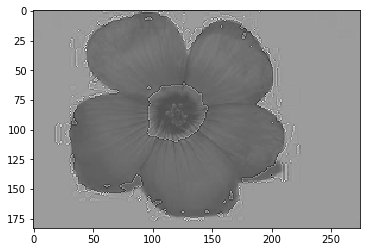

In [113]:
final = image+new_im
plt.imshow(final,cmap='gray')